### Descriptive Statistics using Python

Here, in this Python Jupyter Notebook I'm going to take a sample **[Attendance Data](./data/attendance_data.csv)**.

Then I'll perform various _**Statistical (Descriptive) analysis**_ to show some interesting facts about the data.

Attendance Data for 2 year to from APR14 - MAR16 is taken for the analysis to answer following questions:

+ Average Working hours
+ Longest and Shortes Working hours
+ Total Working hours
+ Total Working Days (Present)
+ Vacation Days/Hours 
    + Holidays
    + Earned Leaves
    + Optional Holidays
    + Weekends etc.



### import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Read the dataset in a dataframe using Pandas    

In [2]:
df = pd.read_csv("./data/attendance_data.csv", sep='\n', delimiter=',', header=0, parse_dates=[0])

### Print Data frame column names (headers)

In [3]:
df.columns.values

array(['Date', 'Day', 'Status', 'In Time', 'Out Time', 'Total Hours',
       'Total Attendance Hours', 'Total Time Sheet Hours',
       'Attendance status implying leave debit'], dtype=object)

In [4]:
len(df.columns.values)

9

In [5]:
len(df)

731

In [6]:
df.shape # rows and columns

(731, 9)

In [7]:
df.head(n=10)

,Date,Day,Status,In Time,Out Time,Total Hours,Total Attendance Hours,Total Time Sheet Hours,Attendance status implying leave debit
0,2014-04-01,Tuesday,Earned Leave,NaN,NaN,NaN,0.0,8:48,NaN
1,2014-04-02,Wednesday,Earned Leave,NaN,NaN,NaN,0.0,8:48,NaN
2,2014-04-03,Thursday,Earned Leave,NaN,NaN,NaN,0.0,8:48,NaN
3,2014-04-04,Friday,Earned Leave,NaN,NaN,NaN,0.0,8:48,NaN
4,2014-04-05,Saturday,Weekly Off,NaN,NaN,NaN,0.0,NaN,NaN
5,2014-04-06,Sunday,Weekly Off,NaN,NaN,NaN,0.0,NaN,NaN
6,2014-04-07,Monday,Earned Leave,NaN,NaN,NaN,0.0,8:48,NaN
7,2014-04-08,Tuesday,Present,12:36,19:48,7.2,7.2,NaN,No leave debit
8,2014-04-09,Wednesday,Present,9:10,19:58,10.8,10.8,NaN,No leave debit
9,2014-04-10,Thursday,Present,8:32,19:50,11.3,11.3,NaN,No leave debit


In [8]:
df.tail(n=10)

,Date,Day,Status,In Time,Out Time,Total Hours,Total Attendance Hours,Total Time Sheet Hours,Attendance status implying leave debit
721,2016-03-22,Tuesday,Present,7:46,19:29,11.72,11.72,NaN,No leave debit
722,2016-03-23,Wednesday,Present,8:13,18:12,9.98,9.98,NaN,No leave debit
723,2016-03-24,Thursday,Present,9:57,21:28,11.52,11.52,NaN,No leave debit
724,2016-03-25,Friday,Optional Holiday,NaN,NaN,NaN,0.00,NaN,NaN
725,2016-03-26,Saturday,Weekly Off,NaN,NaN,NaN,0.00,NaN,NaN
726,2016-03-27,Sunday,Weekly Off,NaN,NaN,NaN,0.00,NaN,NaN
727,2016-03-28,Monday,Present,10:23,17:45,7.37,7.37,NaN,No leave debit
728,2016-03-29,Tuesday,Present,8:06,19:58,11.87,11.87,NaN,No leave debit
729,2016-03-30,Wednesday,Present,8:55,18:14,9.32,9.32,NaN,No leave debit
730,2016-03-31,Thursday,Present,8:58,21:34,12.60,12.60,NaN,No leave debit


### Check for missing values

In [9]:
df.apply(lambda x: sum(x.isnull()),axis=0) 

Date                                        0
Day                                         0
Status                                      0
In Time                                   226
Out Time                                  226
Total Hours                               227
Total Attendance Hours                      0
Total Time Sheet Hours                    513
Attendance status implying leave debit    268
dtype: int64

### Drop data frame columns

In [10]:
del df["Total Time Sheet Hours"]
del df["Total Hours"]
df.columns

Index(['Date', 'Day', 'Status', 'In Time', 'Out Time',
       'Total Attendance Hours', 'Attendance status implying leave debit'],
      dtype='object')

In [11]:
df.head(10)

,Date,Day,Status,In Time,Out Time,Total Attendance Hours,Attendance status implying leave debit
0,2014-04-01,Tuesday,Earned Leave,NaN,NaN,0.0,NaN
1,2014-04-02,Wednesday,Earned Leave,NaN,NaN,0.0,NaN
2,2014-04-03,Thursday,Earned Leave,NaN,NaN,0.0,NaN
3,2014-04-04,Friday,Earned Leave,NaN,NaN,0.0,NaN
4,2014-04-05,Saturday,Weekly Off,NaN,NaN,0.0,NaN
5,2014-04-06,Sunday,Weekly Off,NaN,NaN,0.0,NaN
6,2014-04-07,Monday,Earned Leave,NaN,NaN,0.0,NaN
7,2014-04-08,Tuesday,Present,12:36,19:48,7.2,No leave debit
8,2014-04-09,Wednesday,Present,9:10,19:58,10.8,No leave debit
9,2014-04-10,Thursday,Present,8:32,19:50,11.3,No leave debit


### Rename columns

In [12]:
df = df.rename(index=str, 
          columns={"Total Attendance Hours" : "Total Hours", 
                   "Attendance status implying leave debit" : "Attendance status"})
df.head(10)

,Date,Day,Status,In Time,Out Time,Total Hours,Attendance status
0,2014-04-01,Tuesday,Earned Leave,NaN,NaN,0.0,NaN
1,2014-04-02,Wednesday,Earned Leave,NaN,NaN,0.0,NaN
2,2014-04-03,Thursday,Earned Leave,NaN,NaN,0.0,NaN
3,2014-04-04,Friday,Earned Leave,NaN,NaN,0.0,NaN
4,2014-04-05,Saturday,Weekly Off,NaN,NaN,0.0,NaN
5,2014-04-06,Sunday,Weekly Off,NaN,NaN,0.0,NaN
6,2014-04-07,Monday,Earned Leave,NaN,NaN,0.0,NaN
7,2014-04-08,Tuesday,Present,12:36,19:48,7.2,No leave debit
8,2014-04-09,Wednesday,Present,9:10,19:58,10.8,No leave debit
9,2014-04-10,Thursday,Present,8:32,19:50,11.3,No leave debit


### Fill missing data

In [13]:
df["In Time"].fillna(0, inplace=True)
df["Out Time"].fillna(0, inplace=True)
df.head(n=10)

,Date,Day,Status,In Time,Out Time,Total Hours,Attendance status
0,2014-04-01,Tuesday,Earned Leave,0,0,0.0,NaN
1,2014-04-02,Wednesday,Earned Leave,0,0,0.0,NaN
2,2014-04-03,Thursday,Earned Leave,0,0,0.0,NaN
3,2014-04-04,Friday,Earned Leave,0,0,0.0,NaN
4,2014-04-05,Saturday,Weekly Off,0,0,0.0,NaN
5,2014-04-06,Sunday,Weekly Off,0,0,0.0,NaN
6,2014-04-07,Monday,Earned Leave,0,0,0.0,NaN
7,2014-04-08,Tuesday,Present,12:36,19:48,7.2,No leave debit
8,2014-04-09,Wednesday,Present,9:10,19:58,10.8,No leave debit
9,2014-04-10,Thursday,Present,8:32,19:50,11.3,No leave debit


### Filtering records

In [14]:
non_zero_total_hrs = (df["Total Hours"] > 0.0)

df_non_zero_total_hrs = df[non_zero_total_hrs]

df_non_zero_total_hrs.head(10)

,Date,Day,Status,In Time,Out Time,Total Hours,Attendance status
7,2014-04-08,Tuesday,Present,12:36,19:48,7.20,No leave debit
8,2014-04-09,Wednesday,Present,9:10,19:58,10.80,No leave debit
9,2014-04-10,Thursday,Present,8:32,19:50,11.30,No leave debit
10,2014-04-11,Friday,Present,10:18,18:18,8.00,No leave debit
11,2014-04-12,Saturday,Weekly Off,9:44,10:47,1.05,NaN
13,2014-04-14,Monday,Present,8:24,19:57,11.55,No leave debit
14,2014-04-15,Tuesday,Present,9:20,19:27,10.12,No leave debit
15,2014-04-16,Wednesday,Present,9:07,19:55,10.80,No leave debit
16,2014-04-17,Thursday,Present,9:08,18:20,9.20,No leave debit
17,2014-04-18,Friday,Present,8:51,20:54,12.05,No leave debit


### Get Summary of Data

In [15]:
df["Day"].value_counts()

Thursday     105
Wednesday    105
Tuesday      105
Sunday       104
Saturday     104
Monday       104
Friday       104
Name: Day, dtype: int64

In [16]:
df["Day"].value_counts().sum()

731

In [17]:
df["Status"].value_counts()

Present             463
Weekly Off          207
Earned Leave         39
Holiday              21
Optional Holiday      1
Name: Status, dtype: int64

In [18]:
df["Status"].value_counts().sum()

731

In [19]:
df["Attendance status"].value_counts()

No leave debit    463
Name: Attendance status, dtype: int64

In [20]:
df["Attendance status"].value_counts().sum()

463

In [21]:
df["Attendance status"].fillna("No leave debit", inplace=True)
df.head(10)

,Date,Day,Status,In Time,Out Time,Total Hours,Attendance status
0,2014-04-01,Tuesday,Earned Leave,0,0,0.0,No leave debit
1,2014-04-02,Wednesday,Earned Leave,0,0,0.0,No leave debit
2,2014-04-03,Thursday,Earned Leave,0,0,0.0,No leave debit
3,2014-04-04,Friday,Earned Leave,0,0,0.0,No leave debit
4,2014-04-05,Saturday,Weekly Off,0,0,0.0,No leave debit
5,2014-04-06,Sunday,Weekly Off,0,0,0.0,No leave debit
6,2014-04-07,Monday,Earned Leave,0,0,0.0,No leave debit
7,2014-04-08,Tuesday,Present,12:36,19:48,7.2,No leave debit
8,2014-04-09,Wednesday,Present,9:10,19:58,10.8,No leave debit
9,2014-04-10,Thursday,Present,8:32,19:50,11.3,No leave debit


In [22]:
df["Attendance status"].value_counts()

No leave debit    731
Name: Attendance status, dtype: int64

In [23]:
df["Total Hours"].sum()

4574.950000000001

In [24]:
df["Total Hours"].mean()

6.2584815321477425

In [25]:
df["Total Hours"].median()

8.72

In [26]:
df["Total Hours"].mode()

0    0.0
dtype: float64

In [27]:
df.describe()

,Total Hours
count,731.000000
mean,6.258482
std,4.591328
min,0.000000
25%,0.000000
50%,8.720000
75%,9.840000
max,14.570000


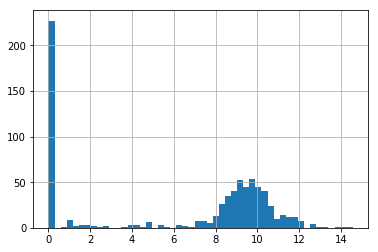

In [28]:
df['Total Hours'].hist(bins=50)

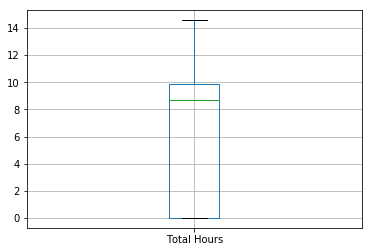

In [29]:
df.boxplot(column='Total Hours')

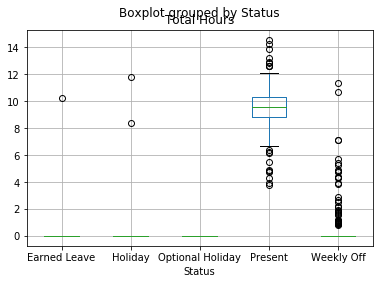

In [30]:
df.boxplot(column='Total Hours', by = 'Status')

### After cleanup of zero value records

In [31]:
df_non_zero_total_hrs["Total Hours"].sum()

4574.95

In [32]:
df_non_zero_total_hrs["Total Hours"].mean()

9.077281746031746

In [33]:
df_non_zero_total_hrs["Total Hours"].median()

9.43

In [34]:
df_non_zero_total_hrs["Total Hours"].mode()

0    8.35
1    9.03
2    9.50
3    9.73
dtype: float64

In [35]:
df_non_zero_total_hrs.describe()

,Total Hours
count,504.000000
mean,9.077282
std,2.226151
min,0.850000
25%,8.595000
50%,9.430000
75%,10.220000
max,14.570000


In [36]:
type(df["Date"])

pandas.core.series.Series

In [37]:
df["Date"][0]

Timestamp('2014-04-01 00:00:00')

In [38]:
type(df["Date"][0])

pandas._libs.tslib.Timestamp

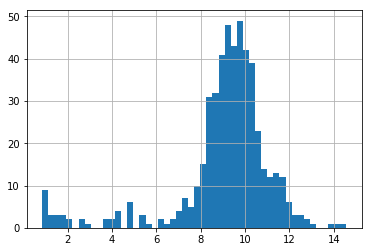

In [39]:
df_non_zero_total_hrs['Total Hours'].hist(bins=50)

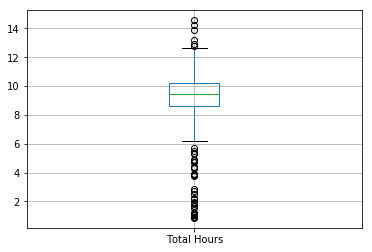

In [40]:
df_non_zero_total_hrs.boxplot(column='Total Hours')

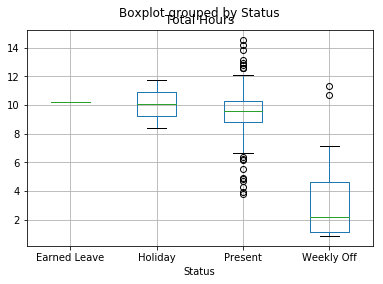

In [41]:
df_non_zero_total_hrs.boxplot(column='Total Hours', by = 'Status')